In [96]:
# -*- coding: utf-8 -*-

import pandas as pd

file_path = '../data/chipotle.tsv'

# read_csv() 함수로 데이터를 데이터 프레임 형태로 불러옴
chipo = pd.read_csv(file_path, sep = '\t')

chipo.shape # 데이터의 행과 열의 크기를 반환
chipo.info() # 행의 구성 정보와 열의 구성 정보 출력

# 데이터 프레임에서 object 타입은 일반적으로 문자열을 의미
# null은 데이터가 비어 있는 것을 의미 (결측값이라고도 함)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            4622 non-null   int64 
 1   quantity            4622 non-null   int64 
 2   item_name           4622 non-null   object
 3   choice_description  3376 non-null   object
 4   item_price          4622 non-null   object
dtypes: int64(2), object(3)
memory usage: 180.7+ KB


In [97]:
# 10개의 데이터 출력
chipo.head(10)

print(chipo.columns) # 행의 목록
print(chipo.index) # 열의 목록

Index(['order_id', 'quantity', 'item_name', 'choice_description',
       'item_price'],
      dtype='object')
RangeIndex(start=0, stop=4622, step=1)


In [98]:
# order_id는 숫자의 의미를 가지지 않기 떄문에 str로 변환
chipo['order_id'] = chipo['order_id'].astype(str)

# chipo 데이터 프레임에서 수치형 피처들의 기초 통계량을 확인
print(chipo.describe())

# 수치형 피처
# 1. 연속형 피처
# 어떤 구간 안의 모든 값을 데이터로써 가질 수 있음
# 2. 비연속형 피처
# 셀 수 있으며, 일정 구간 안에서 정해진 몇 개의 값을 가져야 한다.

# 범주형 피처
# 1. 순서 있는 범주형 피처
# 순서가 있으나 수치는 아니다.
# 2. 순서 없는 범주형 피처
# 데이터가 구분되면서도 순서가 없다.

          quantity
count  4622.000000
mean      1.075725
std       0.410186
min       1.000000
25%       1.000000
50%       1.000000
75%       1.000000
max      15.000000


In [99]:
# order_id와 item_name의 개수를 출력함
# 이 두 피처는 범주형 피처이기 때문에 unique() 함수를 사용해야함.
print(len(chipo['order_id'].unique()))
print(len(chipo["item_name"].unique()))

1834
50


In [100]:
# 가장 많이 주문한 아이템 상위 10
item_count = chipo['item_name'].value_counts()[:10]

# python3에서는 list가 아닌 iterator를 return하고 iteritems() 함수는 쓸 수 없다.
# iteritems() 대신에 items()를 사용해야함.
for idx, (val, cnt) in enumerate(item_count.items(), 1):
    print("Top", idx, ":", val, cnt)

Top 1 : Chicken Bowl 726
Top 2 : Chicken Burrito 553
Top 3 : Chips and Guacamole 479
Top 4 : Steak Burrito 368
Top 5 : Canned Soft Drink 301
Top 6 : Steak Bowl 211
Top 7 : Chips 211
Top 8 : Bottled Water 162
Top 9 : Chicken Soft Tacos 115
Top 10 : Chips and Fresh Tomato Salsa 110


In [101]:
# 아이템별 주문 개수와 총량 구하기
order_count = chipo.groupby('item_name')['order_id'].count()
order_count[:10]

item_name
6 Pack Soft Drink         54
Barbacoa Bowl             66
Barbacoa Burrito          91
Barbacoa Crispy Tacos     11
Barbacoa Salad Bowl       10
Barbacoa Soft Tacos       25
Bottled Water            162
Bowl                       2
Burrito                    6
Canned Soda              104
Name: order_id, dtype: int64

In [102]:
# 아이템별 주문 총량 계산
item_quantity = chipo.groupby('item_name')['quantity'].count()
item_quantity[:10]

item_name
6 Pack Soft Drink         54
Barbacoa Bowl             66
Barbacoa Burrito          91
Barbacoa Crispy Tacos     11
Barbacoa Salad Bowl       10
Barbacoa Soft Tacos       25
Bottled Water            162
Bowl                       2
Burrito                    6
Canned Soda              104
Name: quantity, dtype: int64

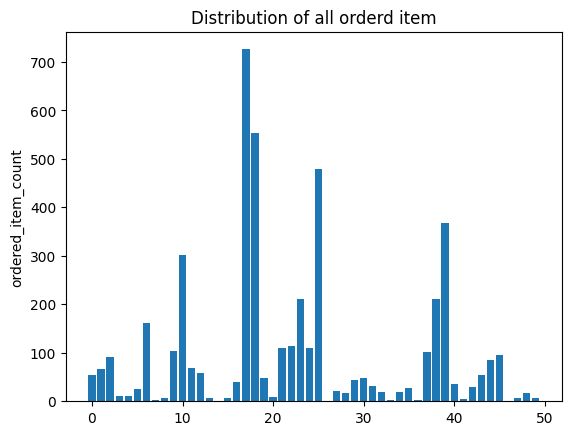

In [103]:
# 시각화로 분석 결과 살펴보기
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

item_name_list = item_quantity.index.tolist()
x_pos = np.arange(len(item_name_list))
order_cnt = item_quantity.values.tolist()

plt.bar(x_pos, order_cnt, align='center')
plt.ylabel('ordered_item_count')
plt.title('Distribution of all orderd item')

plt.show()

# value_count()
# 객체에서 등장하는 모든 데이터의 범주를 각각의 개수와 함께 반환하는 함수

# unique()
# 모든 데이터의 범주만을 반환

In [104]:
# item_price 피처 확인
print(chipo.info())
chipo['item_price'].head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            4622 non-null   object
 1   quantity            4622 non-null   int64 
 2   item_name           4622 non-null   object
 3   choice_description  3376 non-null   object
 4   item_price          4622 non-null   object
dtypes: int64(1), object(4)
memory usage: 180.7+ KB
None


0     $2.39 
1     $3.39 
2     $3.39 
3     $2.39 
4    $16.98 
Name: item_price, dtype: object

In [105]:
# apply()와 lambda를 사용하여 데이터 전처리
chipo['item_price'] = chipo['item_price'].apply(lambda x: float(x[1:]))
chipo.describe()

# apply()
# 시리즈 단위의 연산을 처리한느 기능 수행
# lambda
# lambda를 사용하여 item_price의 $를 제거
# lambda x: float(x[1:])

,quantity,item_price
count,4622.000000,4622.000000
mean,1.075725,7.464336
std,0.410186,4.245557
min,1.000000,1.090000
25%,1.000000,3.390000
50%,1.000000,8.750000
75%,1.000000,9.250000
max,15.000000,44.250000


In [106]:
# 주문당 평균 계산 금액 출력
chipo.groupby('order_id')['item_price'].sum().mean()

# order_id 그룹 생성 -> item_price 피처에 sum() -> 평균 계산

np.float64(18.811428571428568)

In [107]:
# 한 주문에 10달러 이상 지불한 주문 번호 출력
chipo_orderid_group = chipo.groupby('order_id').sum()
results = chipo_orderid_group[chipo_orderid_group.item_price >= 10]
print(results[:10])
print(results.index.values)

          quantity                                          item_name  \
order_id                                                                
1                4  Chips and Fresh Tomato SalsaIzzeNantucket Nect...   
10               2                    Chicken BowlChips and Guacamole   
100              2                           Steak BurritoCanned Soda   
1000             2                          Barbacoa BowlChicken Bowl   
1001             2                           Steak BurritoCanned Soda   
1002             2                      Barbacoa BurritoSide of Chips   
1003             2                  Carnitas BurritoCanned Soft Drink   
1004             2                                       Chicken Bowl   
1005             3              Chicken BurritoChipsCanned Soft Drink   
1006             8  Chicken Soft TacosVeggie BowlSteak BowlChicken...   

                                         choice_description  item_price  
order_id                                         

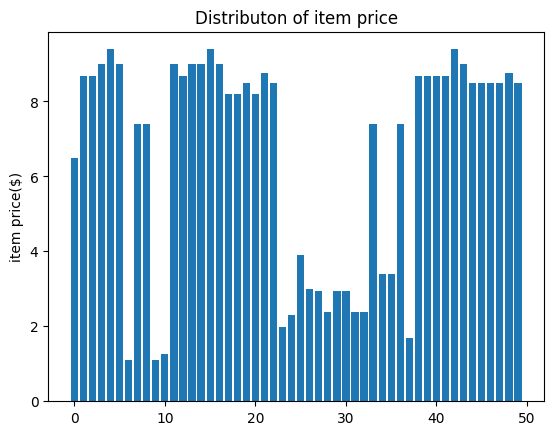

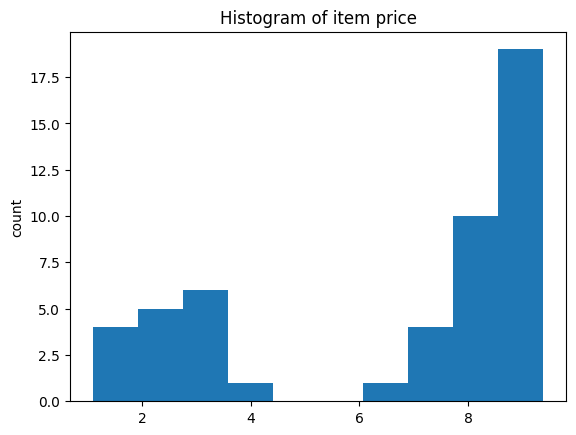

In [108]:
# 각 아이템의 가격 구하기
chipo_one_item = chipo[chipo.quantity == 1]
price_per_item = chipo_one_item.groupby('item_name').min()

# 시리즈 데이터 정렬
price_per_item.sort_values(by = 'item_price', ascending=False)[:10]

# 아이템 가격 분포 그래프 출력
item_name_list = price_per_item.index.tolist()
x_pos = np.arange(len(item_name_list))
item_price = price_per_item['item_price'].tolist()

plt.bar(x_pos, item_price, align='center')
plt.ylabel('item price($)')
plt.title("Distributon of item price")
plt.show()

# 아이템 가격 히스토그램 출력
plt.hist(item_price)
plt.ylabel('count')
plt.title('Histogram of item price')
plt.show()

In [109]:
# 가장 비싼 주문에서 아이템이 총 몇 개 팔렸는지 구하기
chipo.groupby('order_id').sum().sort_values(by='item_price', ascending=False)[:5]

,quantity,item_name,choice_description,item_price
order_id,,,,
926,23,Steak BurritoChicken BowlChicken BowlChicken B...,"[Fresh Tomato Salsa, [Rice, Sour Cream, Lettuc...",205.25
1443,35,Chips and Fresh Tomato SalsaBottled Water6 Pac...,"[Coke][Fresh Tomato Salsa, [Fajita Vegetables,...",160.74
1483,14,Chicken BowlSteak BowlChicken BurritoSteak Bow...,"[Roasted Chili Corn Salsa, [Rice, Black Beans,...",139.00
691,11,Chicken BurritoChicken Salad BowlSteak Burrito...,"[Tomatillo Red Chili Salsa, [Rice, Cheese, Sou...",118.25
1786,20,Chicken BowlCarnitas BurritoChicken BowlChicke...,"[Fresh Tomato Salsa, Rice][Fresh Tomato Salsa,...",114.30


In [110]:
# 특정 제품이 몇 번 주문되었는지 구하기
chipo_salad = chipo[chipo['item_name'] == 'Veggie Salad Bowl']

# 중복 제거
chipo_salad = chipo_salad.drop_duplicates(['item_name', 'order_id'])

print(len(chipo_salad))
chipo_salad.head(5)

18


,order_id,quantity,item_name,choice_description,item_price
186,83,1,Veggie Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",11.25
295,128,1,Veggie Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",11.25
455,195,1,Veggie Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",11.25
496,207,1,Veggie Salad Bowl,"[Fresh Tomato Salsa, [Rice, Lettuce, Guacamole...",11.25
960,394,1,Veggie Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",8.75


In [116]:
# 특정 제품이 2개 이상 주문된 주문 횟수 구하기
chipo_chicken = chipo[chipo["item_name"] == "Chicken Bowl"]

chipo_chicken_result = chipo_chicken[chipo_chicken['quantity'] >= 2]
print(chipo_chicken_result.shape[0])
chipo_chicken_result.describe()

33


,quantity,item_price
count,33.000000,33.000000
mean,2.060606,19.476061
std,0.242306,3.548954
min,2.000000,16.980000
25%,2.000000,16.980000
50%,2.000000,17.500000
75%,2.000000,21.960000
max,3.000000,32.940000
